In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
!cp  -r /content/drive/MyDrive/Colab_Notebooks/data/images/image_train /content
print("Ok!")
print("nombre d'images :")
!find /content/image_train/ -name '*.jpg' | wc -l

Ok!
nombre d'images :
84916


In [19]:
!python --version
!find /content/image_train/ -name '*.jpg' | wc -l

Python 3.10.12
84916


In [1]:
import sys
#sys.path.append('E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/src')
sys.path.append('/content/drive/MyDrive/Colab_Notebooks/src')
!pip install -r /content/drive/MyDrive/Colab_Notebooks/requirements.txt

In [8]:
import configparser
config = configparser.ConfigParser()
#config.read('E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/Rakuten_config.ini')
config.read('/content/drive/MyDrive/Colab_Notebooks/Rakuten_config_colab.ini')
def get_RACINE_DOSSIER() :
    return config['DOSSIER']['RACINE_DOSSIER']
def get_RACINE_IMAGES() :
    return config['DOSSIER']['RACINE_IMAGES']
print( get_RACINE_DOSSIER())
print( get_RACINE_IMAGES())

/content/drive/MyDrive/Colab_Notebooks/input/
/content/drive/MyDrive/Colab_Notebooks/data/images/image_train


In [9]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

In [10]:
# lecture des données sources d'entrainement
df_feats=pd.read_csv(get_RACINE_DOSSIER() + 'X_train_update.csv')

# lecture des données cibles d'entrainement
df_target=pd.read_csv(get_RACINE_DOSSIER() + 'Y_train_CVw08PX.csv')


# création d'un dataframe globale -  jointure
df=df_feats.merge(df_target,on='Unnamed: 0',how='inner')
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)
cat=df_target['prdtypecode'].sort_values().unique()
cat
nomenclature=pd.read_csv(get_RACINE_DOSSIER() + 'NOMENCLATURE.csv',header=0,encoding='utf-8',sep=';',index_col=0)
catdict=nomenclature.to_dict()['definition']

In [11]:
df_feats.head(5)
cat=df_target['prdtypecode'].sort_values().unique()

In [12]:
df_target.head(5)

,Unnamed: 0,prdtypecode
0,0,10
1,1,2280
2,2,50
3,3,1280
4,4,2705


In [20]:
df['nom_image']=df.apply(lambda row: "image_" +  str(row['imageid'])
                                     + "_product_" + str(row['productid']) + ".jpg",axis=1)
print("Nb enreg ", str(df.shape[0]))
df.head(5)
df_img=df.copy()

Nb enreg  84916


### test de lecture d'images

    Id                                        designation  \
2    2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
31  31                                X-Men 3 - The Movie   
34  34                              The Lord Or Thé Rings   
47  47       Shin Masoukishin Panzer Warfare (Import Jap)   
50  50                             Jeu Pc Cd-Rom : Azteca   

                                          description   productid     imageid  \
2   PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978   
31                                                NaN    49132716   874730792   
34                                                NaN  4237073471  1324384878   
47                                                NaN     8870838   868167157   
50                                                NaN  4232229083  1322918708   

    prdtypecode                                nom_image  
2            50    image_938777978_product_201115110.jpg  
31           40     image_87

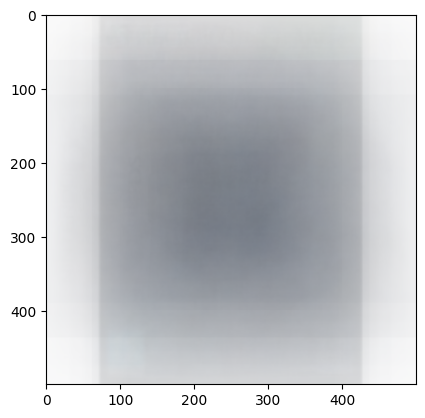

In [21]:
import os
import cv2
import numpy as np

from PIL import Image

# Définir le chemin du dossier contenant les images
folder_path = get_RACINE_IMAGES()
#folder_path = "C:\\Users\\shaky\\anaconda3\\envs\\Datascientest\\Datascience\\PROJET\\images\\image_train"
df_img=df[df['prdtypecode'].isin([40,50])]
#df_img=df[df['prdtypecode'] == 40]
#df_img=df_img.iloc[:100,:]
#df_img=df.copy()
print(df_img.head())
print(df_img.info())

# Charger les images et les stocker dans un tableau
fichiers_images = []

for filename in df_img['nom_image']:
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        fichiers_images.append(img)

# Lisez la première image pour obtenir la taille
premiere_image = fichiers_images[0]
hauteur, largeur, _ = premiere_image.shape

print(hauteur, largeur)
print(len(fichiers_images))

# Créez un tableau numpy pour stocker la somme de toutes les images
somme_images = np.zeros((hauteur, largeur, 3), np.float32)

# Parcourez chaque image
for fichier_image in fichiers_images:
    # Lisez l'image
    image = fichier_image

    # Ajoutez cette image à la somme des images
    somme_images = somme_images + image

print("etape 1")
# Calculez la moyenne des images en divisant la somme par le nombre d'images
moyenne_images = somme_images / len(fichiers_images)
print("etape 2")
# Assurez-vous que les valeurs sont de type int, car les pixels ne peuvent pas avoir de valeurs fractionnaires
moyenne_images = np.array(np.round(moyenne_images), dtype=np.uint8)

plt.imshow(moyenne_images)
plt.show()




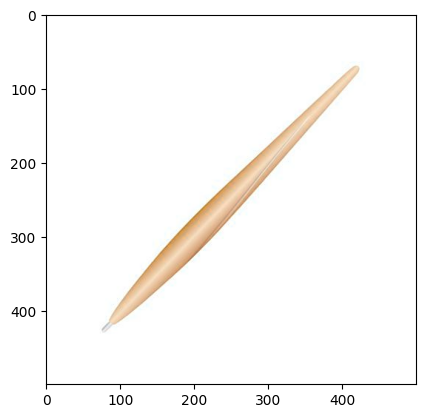

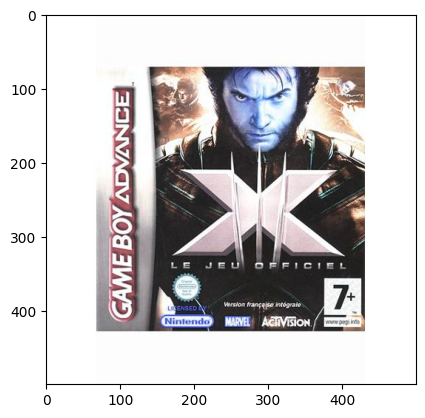

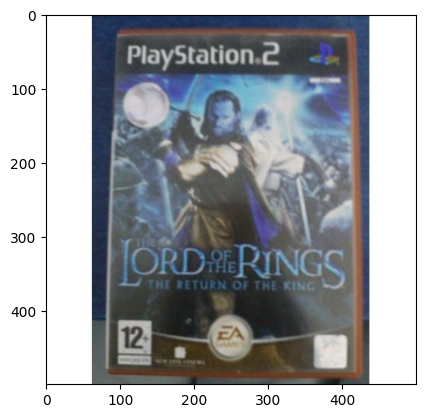

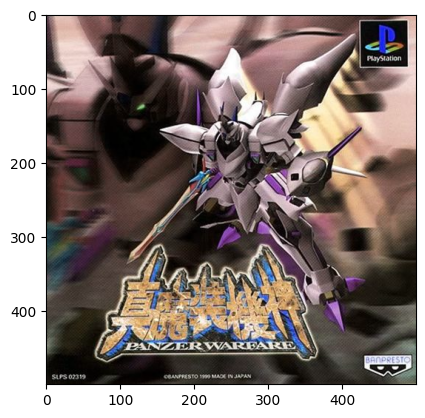

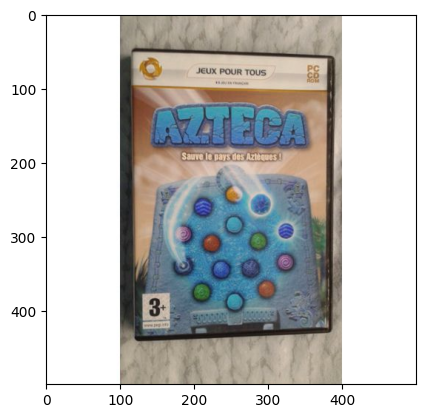

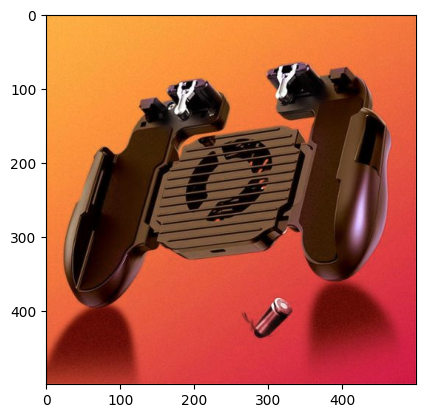

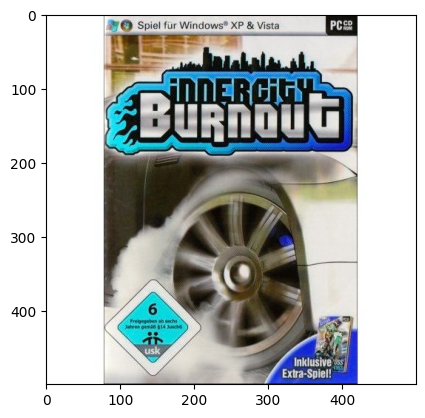

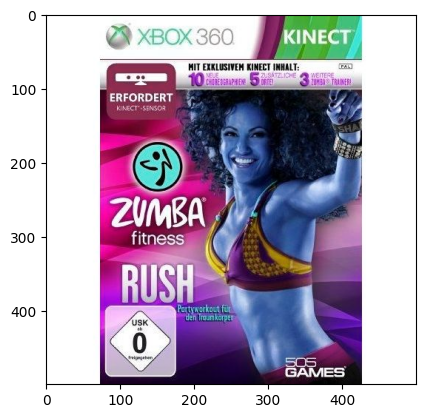

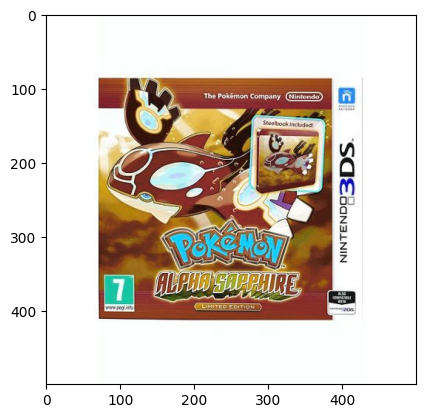

In [22]:
for i in range(9):
    image=fichiers_images[i]
    plt.imshow(image)
    plt.show()

## Images moyenne par Catégorie

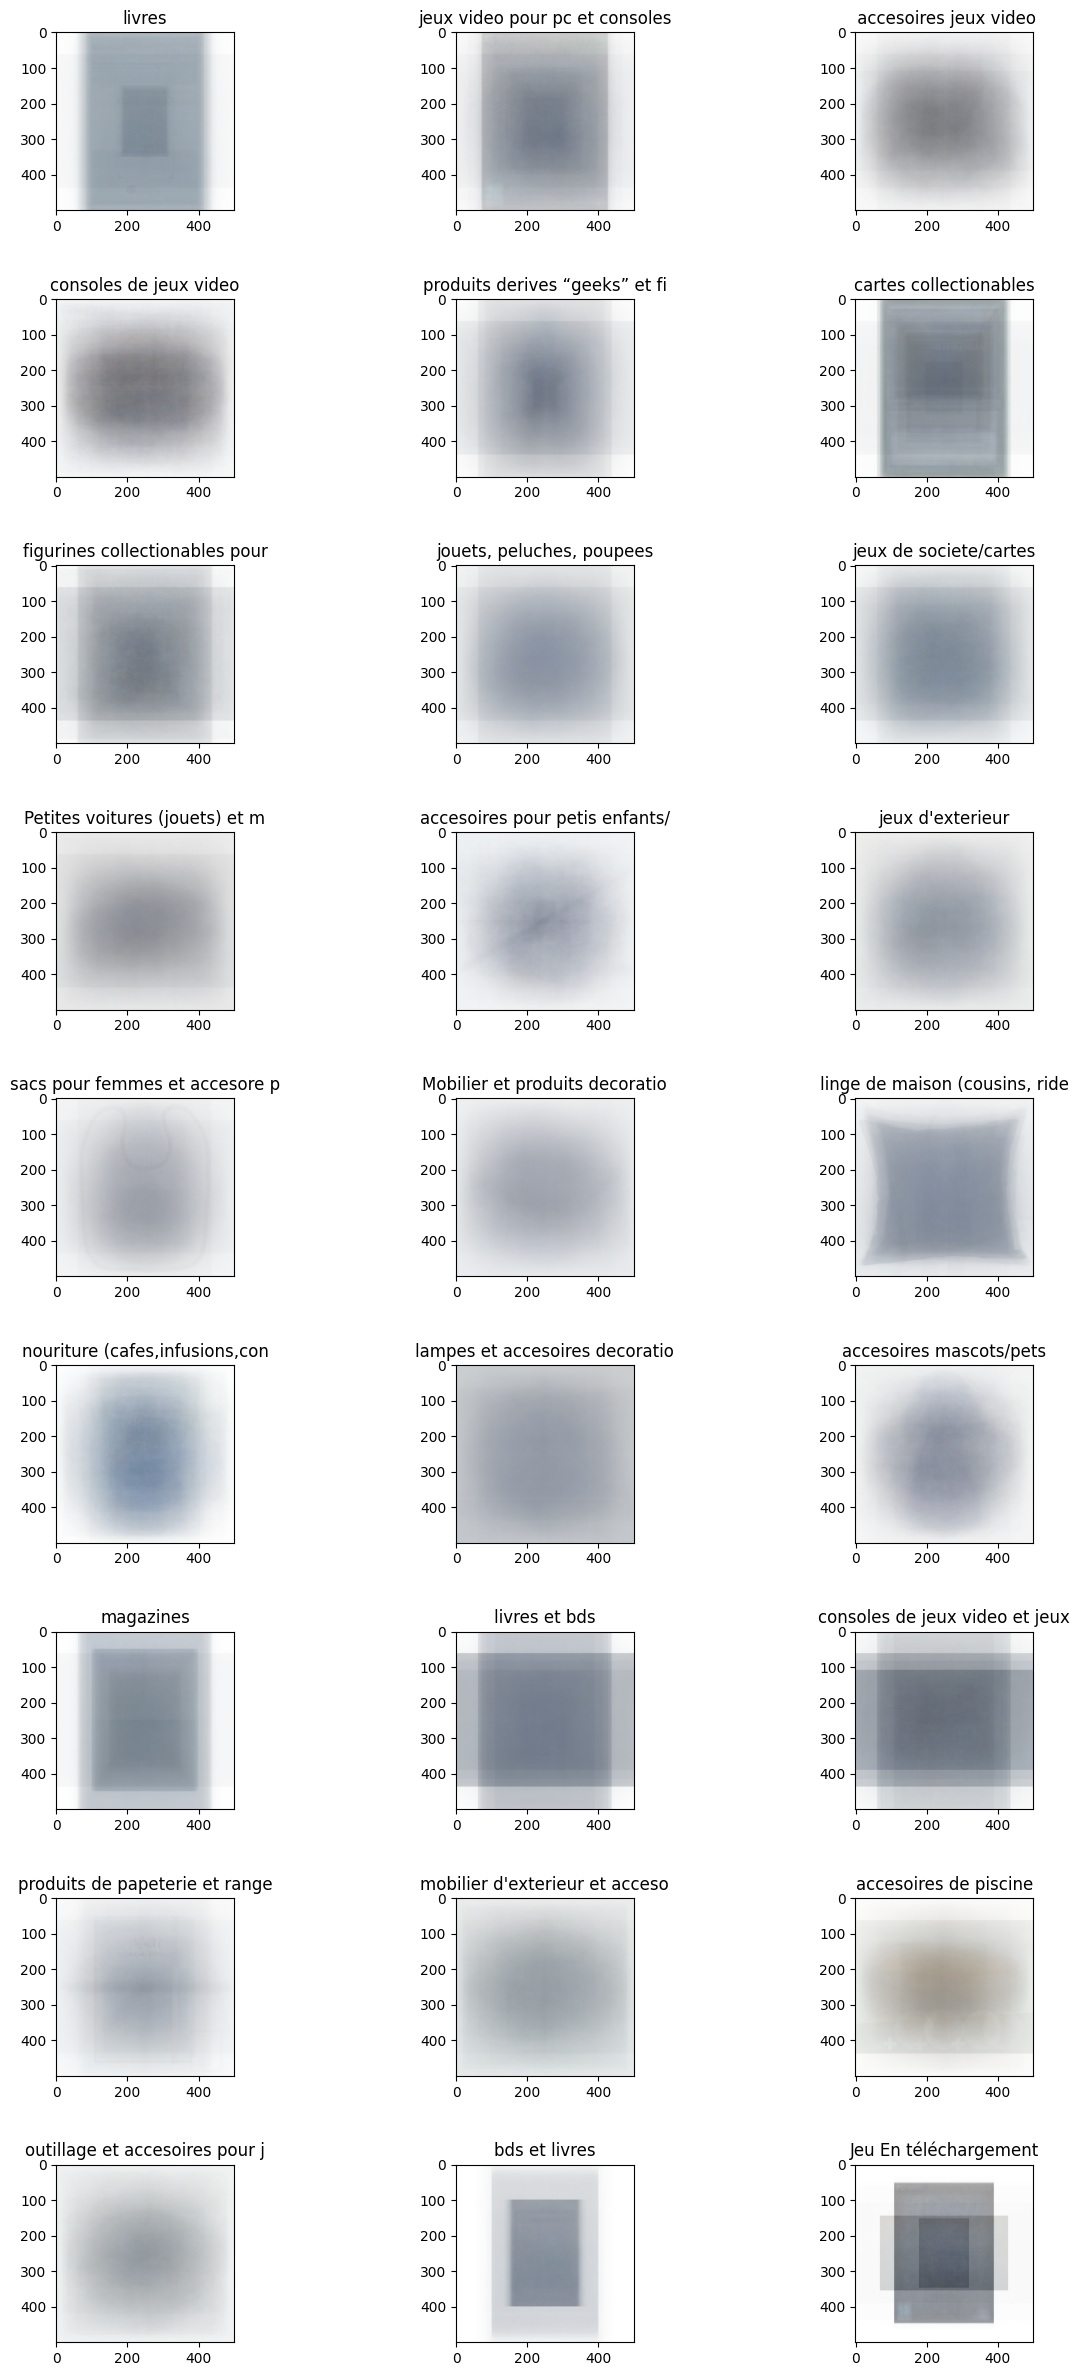

In [23]:
import os
import cv2
import numpy as np

folder_path = get_RACINE_IMAGES()
#folder_path = "C:\\Users\\shaky\\anaconda3\\envs\\Datascientest\\Datascience\\PROJET\\images\\image_train"
df_img=df.copy()
Dfhisto=pd.DataFrame()
fig, axs = plt.subplots(9, 3, figsize=(15,30))
for c,ax in zip(cat,axs.flat):
    #print(c,catdict[c])
    fichiers_images = []
    for filename in df_img[df_img['prdtypecode']==c]['nom_image']:
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            fichiers_images.append(img)
    #print("Nb fichiers ",len(fichiers_images))
    # Lisez la première image pour obtenir la taille
    premiere_image = fichiers_images[0]
    hauteur, largeur, _ = premiere_image.shape

    #print(hauteur, largeur)
    #print(len(fichiers_images))

    # Créez un tableau numpy pour stocker la somme de toutes les images
    somme_images = np.zeros((hauteur, largeur, 3), np.float32)

    # Parcourez chaque image
    for fichier_image in fichiers_images:
        # Lisez l'image
        image = fichier_image

        # Ajoutez cette image à la somme des images
        somme_images = somme_images + image

    #print("etape 1")
    # Calculez la moyenne des images en divisant la somme par le nombre d'images
    moyenne_images = somme_images / len(fichiers_images)
    #print("etape 2")
    # Assurez-vous que les valeurs sont de type int, car les pixels ne peuvent pas avoir de valeurs fractionnaires
    moyenne_images = np.array(np.round(moyenne_images), dtype=np.uint8)
    ax.set_title( catdict[c][:30])
    ax.imshow(moyenne_images)
plt.subplots_adjust( wspace=0.1,hspace=0.5)
plt.show()
